In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
import time
import argparse
import collections
import numpy as np

from board import Board, Point
from bot import (random_setup, random_setup_easy,
                 random_move, random_move_target, random_move_parity)
from interface import display_boards, input_move


class Player:
    """
    In this starting implementation, human players setup their board randomly
    and only choose where to shoot.

    Bot players setup their board randomly and also shoot randomly.
    """
    def __init__(self, is_bot: bool):
        self.is_bot = is_bot
        self.board = self.place_ships()
        self.queue = collections.deque([])
        self.prev_hit = None
        self.hit_direction = [None, None]

    def place_ships(self) -> Board:
        """Returns a Board with ships placed."""
        # return random_setup()
        return random_setup_easy()

    def choose_move(self, opponent_board_view: Board, mode='random') -> Point:
        """
        Takes a view of the opponent's board and
        returns the coordinates of the next shot.
        """
        if mode == 'random':
            return random_move(opponent_board_view.shots) \
                if self.is_bot else input_move(opponent_board_view.shots)
        elif mode == 'target':
            return random_move_target(self.queue, opponent_board_view) \
                if self.is_bot else input_move(opponent_board_view.shots)
        elif mode == 'parity':
            # print('moving...')
            return random_move_parity(opponent_board_view, self) \
                if self.is_bot else input_move(opponent_board_view.shots)

    def display(self, opponent_board_view: Board, show_bot=False) -> None:
        """When true, we'll print the board each move."""
        if not self.is_bot or show_bot is True:
            # display boards only in human mode
            display_boards(self.board, opponent_board_view.shots)


def play_one_game(player1: Player, player2: Player, mode, display_bot=False):

    move_cnt_p1 = 0
    move_cnt_p2 = 0

    while True:

        if player1.is_bot and player2.is_bot and display_bot:  # for displaying bots only
            time.sleep(2)

        player1.display(player2.board, display_bot)
        if player2.board.all_sunk():
#             print(f"Player 1 wins! Total moves: {move_cnt_p1}.\n")
            return move_cnt_p1
        player1_move = player1.choose_move(player2.board, mode)
        move_cnt_p1 += 1
        player2.board.make_move(player1_move)
        try:
            for ship, loc in player2.board.ship_loc:
                if len(loc) == 0:
                    player2.board.ship_loc.remove((ship, loc))
                    player1.board.text_field += f'A {ship} of Player 2 is sunk!\n'
        except:
            pass

        player2.display(player1.board, display_bot)
        if player1.board.all_sunk():
#             print(f"Player 2 wins! Total moves: {move_cnt_p2}.\n")
            return move_cnt_p2
        player2_move = player2.choose_move(player1.board, mode)
        move_cnt_p2 += 1
        player1.board.make_move(player2_move)
        try:
            for ship, loc in player1.board.ship_loc:
                if len(loc) == 0:
                    player1.board.ship_loc.remove((ship, loc))
                    player2.board.text_field += f'A {ship} of Player 1 is sunk!\n'
        except:
            pass


def str2bool(v):
    # reference: https://stackoverflow.com/questions/15008758/parsing-boolean-values-with-argparse
    if isinstance(v, bool):
        return v
    if v.lower() in ('yes', 'true', 't', 'y', '1'):
        return True
    elif v.lower() in ('no', 'false', 'f', 'n', '0'):
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')


In [4]:
# random mode
default_cnts = []
for i in range(1000):
    player1 = Player(is_bot=True)
    player2 = Player(is_bot=True)
    cnt = play_one_game(player1, player2, mode='random')
    default_cnts.append(cnt)

In [5]:
# target mode
target_cnts = []
for i in range(1000):
    player1 = Player(is_bot=True)
    player2 = Player(is_bot=True)
    cnt = play_one_game(player1, player2, mode='target')
    target_cnts.append(cnt)

In [7]:
# parity mode
parity_cnts = []
while len(parity_cnts) < 1000:
    player1 = Player(is_bot=True)
    player2 = Player(is_bot=True)
    try:
        cnt = play_one_game(player1, player2, mode='parity')
    except:
        continue
    parity_cnts.append(cnt)

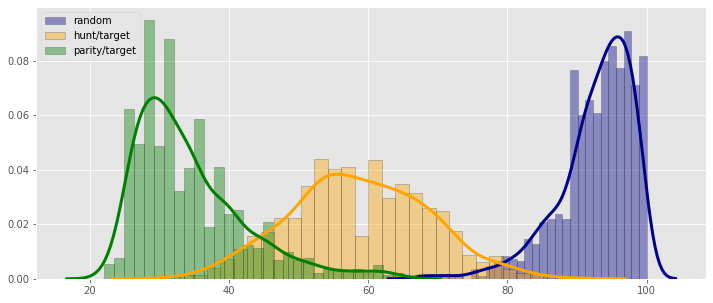

In [10]:
# pdf
plt.rcParams['figure.figsize'] = (12, 5)
sns.distplot(default_cnts, hist=True, kde=True, label='random',
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns.distplot(target_cnts, hist=True, kde=True, label='hunt/target',
             bins=30, color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns.distplot(parity_cnts, hist=True, kde=True, label='parity/target',
             bins=30, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.legend()
plt.show()

In [11]:
np.mean(parity_cnts), np.mean(target_cnts)

(34.336, 58.681)

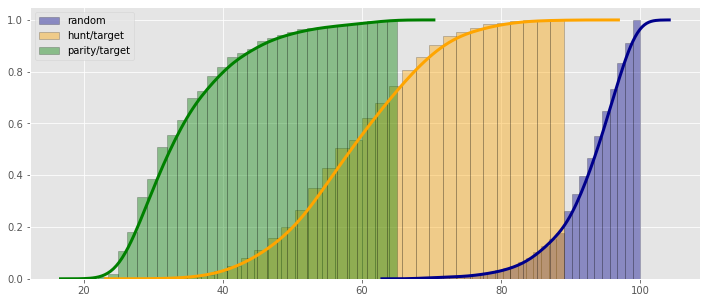

In [12]:
# cdf
plt.rcParams['figure.figsize'] = (12, 5)
sns.distplot(default_cnts, hist=True, kde=True, label='random',
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black', 'cumulative': True},
             kde_kws={'linewidth': 3, 'cumulative': True})
sns.distplot(target_cnts, hist=True, kde=True, label='hunt/target',
             bins=30, color = 'orange', 
             hist_kws={'edgecolor':'black', 'cumulative': True},
             kde_kws={'linewidth': 3, 'cumulative': True})
sns.distplot(parity_cnts, hist=True, kde=True, label='parity/target',
             bins=30, color = 'green', 
             hist_kws={'edgecolor':'black', 'cumulative': True},
             kde_kws={'linewidth': 3, 'cumulative': True})
plt.legend()
plt.show()